**Overall Objective**: Create a model that predicts rent prices as well as possible for typical New York City apartments.

### Part 1 - Create and evaluate an initial model


In [1]:
import pandas as pd
df = pd.read_csv("D:/St Clair/Semester 2/DAB200 Machine learning 1/Lab/Lab 2/rent_5.csv",dtype={'price': float})
print(df.shape) 
df.head(5)       

(20000, 16)


,Unnamed: 0,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,longitude,manager_id,photos,price,street_address,interest_level,num_desc_words
0,0,1.0,2,0,2016-06-21 07:29:45,Makr this stunning place your new home!- 2 bed...,New Lots,"['Pre-War', 'Hardwood Floors']",40.6678,-73.8788,17dd8baf35198562ff9524b486f1754a,['https://photos.renthop.com/2/7194943_5fafcb8...,1475.0,864 New Lots,high,41
1,1,1.0,2,3cc586423f9e977a0f991b010242baa6,2016-06-22 06:44:29,Amazing location!Hardwood floors marble bath g...,Bleecker Street,"['Elevator', 'Laundry in Building', 'Dishwashe...",40.7285,-74.0000,1fb46c4a72bcf764ac35fc23f394760d,['https://photos.renthop.com/2/7201657_9fe4dcc...,3800.0,160 Bleecker Street,high,46
2,2,1.0,1,cd759a988b8f23924b5a2058d5ab2b49,2016-05-04 02:26:23,"DON'T MISS OUT !!! ONE IN A KIND GORGEOUS, HUG...",E 56 St.,"['Doorman', 'Elevator', 'Laundry in Building',...",40.7575,-73.9626,f52612ad89c61a21e84172f0af0d4436,['https://photos.renthop.com/2/6962322_dc4fbd1...,2850.0,405 E 56 St.,low,119
3,3,1.0,3,250ae11aef7ca5668ea55763085d3ff8,2016-06-29 04:31:54,"Not the prettiest, but large, bright and cheap...",E 69 Street,[],40.7657,-73.9572,ac888923cda3b9e4f0311267be25de9c,['https://photos.renthop.com/2/7231045_6bdf593...,3600.0,402 E 69 Street,low,61
4,4,1.0,2,ec1fe7f38e244003ea14df8d2677aa87,2016-04-30 02:23:20,BRIGHT & SUNNNY 2BR/1BA IN PRIME SUNNYSIDE LOC...,46th Street,"['Dogs Allowed', 'Cats Allowed']",40.7379,-73.9196,f2a70ad9a85be944fbe2ca18e9b323cd,['https://photos.renthop.com/2/6945125_02ed49c...,1995.0,48-45 46th Street,high,157


In [2]:
#Because there are a lot of columns, some of which are quite wide, let's flip the display so that the columns are vertical.
df.head(2).T

,0,1
Unnamed: 0,0,1
bathrooms,1.0,1.0
bedrooms,2,2
building_id,0,3cc586423f9e977a0f991b010242baa6
created,2016-06-21 07:29:45,2016-06-22 06:44:29
description,Makr this stunning place your new home!- 2 bed...,Amazing location!Hardwood floors marble bath g...
display_address,New Lots,Bleecker Street
features,"['Pre-War', 'Hardwood Floors']","['Elevator', 'Laundry in Building', 'Dishwashe..."
latitude,40.6678,40.7285
longitude,-73.8788,-74.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       20000 non-null  int64  
 1   bathrooms        20000 non-null  float64
 2   bedrooms         20000 non-null  int64  
 3   building_id      20000 non-null  object 
 4   created          20000 non-null  object 
 5   description      19367 non-null  object 
 6   display_address  19951 non-null  object 
 7   features         20000 non-null  object 
 8   latitude         20000 non-null  float64
 9   longitude        20000 non-null  float64
 10  manager_id       20000 non-null  object 
 11  photos           20000 non-null  object 
 12  price            20000 non-null  float64
 13  street_address   19997 non-null  object 
 14  interest_level   20000 non-null  object 
 15  num_desc_words   20000 non-null  int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 2.4+ MB


In [4]:
#Dropping all the non numeric fields
df_num = df[['bathrooms', 'bedrooms', 'longitude', 'latitude', 'price']]
df_num.head(2)

,bathrooms,bedrooms,longitude,latitude,price
0,1.0,2,-73.8788,40.6678,1475.0
1,1.0,2,-74.0000,40.7285,3800.0


In [5]:
#checkinng null values
print(df_num.isnull().any())

bathrooms    False
bedrooms     False
longitude    False
latitude     False
price        False
dtype: bool


In [6]:
#importing library and Separate the features and target columns.
from sklearn.model_selection import train_test_split
X = df_num.drop('price', axis=1)
y = df_num['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
#Creating an appropriate model with suitable hyper-parameters.
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1)

In [8]:
#Fitting model to the training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [9]:
#calculating R2 for training data
r2 = rf.score(X_train, y_train)
print( f"{r2:.4f}" )

0.8901


In [10]:
#calculating the mean squared error for training data

from sklearn.metrics import mean_absolute_error

predictions = rf.predict(X_train)

e_train = mean_absolute_error(y_train, predictions)

ep_train = e_train*100 / y.mean()

print(f"${e_train:.0f} average error; {ep_train:.2f}% error")

$284 average error; 7.61% error


In [11]:
#calculating out of box score for training data 

rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           oob_score=True)   # get error estimate
rf.fit(X_train, y_train)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

OOB score -0.0090


In [12]:
#using fit on testing dataset.
rf.fit(X_test, y_test)

RandomForestRegressor(n_jobs=-1, oob_score=True)

In [13]:
#calculating MSE on testing data

predictions = rf.predict(X_test)

e_test = mean_absolute_error(y_test, predictions)

ep_test = e_test*100 / y.mean()

print(f"${e_test:.0f} average error; {ep_test:.2f}% error")

$253 average error; 6.77% error


In [14]:
#calculating R2 for testing data

r2_test = rf.score(X_test, y_test)
print( f"{r2_test:.4f}" )

0.9399


In [15]:
#calculating Out of box score for testing data 

rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           oob_score=True)   # get error estimate
rf.fit(X_test, y_test)
noisy_oob_r2_test = rf.oob_score_
print(f"OOB score {noisy_oob_r2_test:.4f}")

OOB score 0.6224


After importing the dataseet we detect a lot of non-numerical data, including several columns that appear to be lists of objects crammed into a single string. Nonnumeric datatypes are anything other than float and int. We may simply drop such columns. The numeric fields are all that matters: bathrooms, bedrooms, longitude, latitude, and price.

Next, we have a correctly prepared data frame, df_num, with just numeric values and no missing values, then we have started training a model by first splitting the dataset into four datasets X_train, X_test, y_train, y_test for training and testing the model at later stage. We have used fit to fit the model on the training data and to actually make a prediction, we call predict() on training dataset.

We trained the model on training data and then calculated its r squared score in the code above. The model trained here has an R2 score of 0.8901, which is considered good The r squared score of 1 indicates that the model is flawless, while a score of 0 indicates that the model will perform poorly on an unknown dataset. This also means that the closer the r squared score is to 1, the better the model has been trained.

Mean absolute error measures the average magnitude of the errors in a set of predictions without considering their direction and Finding MAE and percentage of error on the train set of data to know the average of the errors in the predictions.The percentage error of training dataset is 7.61%. Next we have calculated out of bag score for training dataset which has come out to be -0.0090 which indicates that the model as per this parameter is performing very badly. The OOB score is computed as the number of correctly predicted rows from the out of bag sample.

Next, we are fitting the model on testing dataset and calculating the r squared score,Mean absolute error and out of bag score. Our R2 score is 0.9399 which indicates the model is performing good on testing dataset.OOB score isn OOB score is 0.6224 which is quiet good when compared the OOB score on testing dataset and our MSE have also decreased on testing dataset.

### Part 2 - Denoise the data

This section I include the code necessary to **denoise** the data, and it include what is needed to identify inconsistencies, problems, errors, etc. in the data. 

In [16]:
#setting the format of float variables to decimal 5 characters to better understand the data
pd.options.display.float_format = '{:.5f}'.format

In [17]:
df_num.describe()

,bathrooms,bedrooms,longitude,latitude,price
count,20000.00000,20000.00000,20000.00000,20000.00000,20000.00000
mean,1.21405,1.54525,-73.82665,40.70347,3733.58250
std,0.50069,1.11419,6.68187,1.80229,8014.78253
min,0.00000,0.00000,-124.01510,-18.97900,-18000.00000
25%,1.00000,1.00000,-73.99160,40.72830,2500.00000
50%,1.00000,1.00000,-73.97790,40.75170,3150.00000
75%,1.00000,2.00000,-73.95470,40.77450,4134.00000
max,6.00000,7.00000,158.39500,49.34300,1070000.00000


In [43]:
#Looking at the top 10 prices
print(df_num.price.sort_values(ascending=False).head(10))

5269    1070000.00000
6537     135000.00000
19120    111111.00000
6881      85000.00000
8709      80000.00000
13405     50614.00000
17123     50000.00000
2060      50000.00000
2572      48500.00000
6801      39995.00000
Name: price, dtype: float64


In [44]:
# Counting flats with price greater than 10000 dollars
len(df[df.price>10_000])

371

In [20]:
# Checking counts of apartments with specific numbers of bathrooms
print(df_num.bathrooms.value_counts())

1.00000    15973
2.00000     3099
3.00000      316
1.50000      262
0.00000      116
2.50000      114
4.00000       67
3.50000       29
4.50000       14
5.00000        8
5.50000        1
6.00000        1
Name: bathrooms, dtype: int64


In [21]:
#counts of apartments with specific numbers of bedrooms
print(df_num.bedrooms.value_counts())

1    6390
2    5963
0    3804
3    2928
4     791
5     104
6      19
7       1
Name: bedrooms, dtype: int64


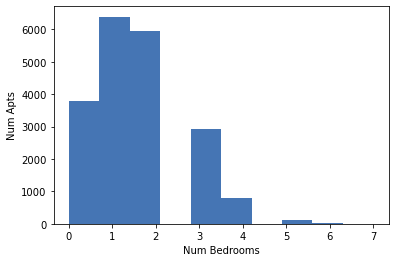

In [45]:
#histogram of number of bedrooms

from matplotlib import pyplot as plt

bookcolors = {
         'crimson': '#a50026', 'red': '#d73027',
         'redorange': '#f46d43', 'orange': '#fdae61',
         'yellow': '#fee090', 'sky': '#e0f3f8',
         'babyblue': '#abd9e9', 'lightblue': '#74add1',
         'blue': '#4575b4', 'purple': '#313695'
     }
fig,ax = plt.subplots()
ax.set_xlabel('Num Bedrooms')
ax.set_ylabel('Num Apts')
ax.hist(df_num.bedrooms, color=bookcolors['blue'])
plt.show()

In [23]:
#apartments at location 0,0
print(len(df[(df.longitude==0.0) & (df.latitude==0.0)]))

6


In [46]:
#Checking price of highest priced apartment in a locality
df_local = df[(df.latitude>40.764) & (df.latitude<40.7678) &
              (df.longitude>=-73.9844) & (df.longitude<=-73.9842) &
           (df.bathrooms==1) & (df.bedrooms==1)]
df_local[['bedrooms','bathrooms','street_address','price']].sort_values('price')

,bedrooms,bathrooms,street_address,price
11428,1,1.00000,west 54 st & 8 ave,2300.00000
19465,1,1.00000,300 West 55th Street,2400.00000
5269,1,1.00000,333 West 57th Street,1070000.00000


In [25]:
#deleting apartment outside our price range
df_clean = df_num[(df_num.price>1_000) & (df_num.price<10_000)]

In [26]:
df_clean.describe()

,bathrooms,bedrooms,longitude,latitude,price
count,19557.00000,19557.00000,19557.00000,19557.00000,19557.00000
mean,1.17802,1.51030,-73.82239,40.70198,3437.69065
std,0.42202,1.08931,6.75565,1.82232,1400.33596
min,0.00000,0.00000,-124.01510,-18.97900,1048.00000
25%,1.00000,1.00000,-73.99160,40.72820,2495.00000
50%,1.00000,1.00000,-73.97790,40.75140,3100.00000
75%,1.00000,2.00000,-73.95450,40.77430,4000.00000
max,5.00000,7.00000,158.39500,49.34300,9995.00000


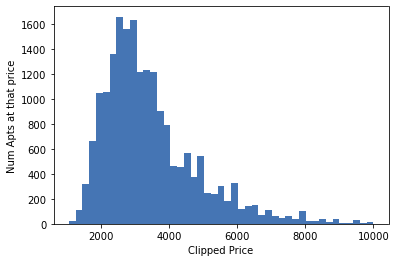

In [27]:
fig,ax = plt.subplots()
ax.set_xlabel('Clipped Price')
ax.set_ylabel('Num Apts at that price')
ax.hist(df_clean.price, bins=45, color=bookcolors['blue'])
plt.show()

In [47]:
#checking number of apartments at location 0,0
df_missing = df_clean[(df_clean.longitude==0) | (df_clean.latitude==0)]
print(len(df_missing))

0


In [48]:
#Deleting apartments having latitude and longitude 0,0
df_clean = df_clean[(df_clean.longitude!=0) | (df_clean.latitude!=0)]

In [30]:
df_clean.describe()

,bathrooms,bedrooms,longitude,latitude,price
count,19551.00000,19551.00000,19551.00000,19551.00000,19551.00000
mean,1.17787,1.51010,-73.84505,40.71447,3437.45599
std,0.42119,1.08893,6.63172,1.67728,1399.71288
min,0.00000,0.00000,-124.01510,-18.97900,1048.00000
25%,1.00000,1.00000,-73.99160,40.72820,2495.00000
50%,1.00000,1.00000,-73.97790,40.75140,3100.00000
75%,1.00000,2.00000,-73.95450,40.77430,4000.00000
max,4.50000,7.00000,158.39500,49.34300,9995.00000


In [49]:
#deleting apartments outside New York city
df_clean = df_clean[(df_clean['latitude']>40.55) &
                    (df_clean['latitude']<40.94) &
                    (df_clean['longitude']>-74.1) &
                    (df_clean['longitude']<-73.67)]

In [32]:
df_clean.describe()

,bathrooms,bedrooms,longitude,latitude,price
count,19498.00000,19498.00000,19498.00000,19498.00000,19498.00000
mean,1.17776,1.51010,-73.97228,40.75091,3438.38778
std,0.42110,1.08920,0.02959,0.03966,1400.00930
min,0.00000,0.00000,-74.06040,40.57570,1048.00000
25%,1.00000,1.00000,-73.99160,40.72820,2495.00000
50%,1.00000,1.00000,-73.97790,40.75140,3100.00000
75%,1.00000,2.00000,-73.95460,40.77410,4000.00000
max,4.50000,7.00000,-73.70010,40.91540,9995.00000


### Part 3 - Create and evaluate a final model

Create the final model using the deonised data, compare the original models and the new model using oob **score** and the **R-squared**.


In [33]:
X = df_clean.drop('price', axis=1)
y = df_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [34]:
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1)

In [35]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [36]:
r2 = rf.score(X_train, y_train)
print( f"{r2:.4f}" )

0.9489


In [37]:
from sklearn.metrics import mean_absolute_error

predictions = rf.predict(X_train)

e_train = mean_absolute_error(y_train, predictions)

ep_train = e_train*100 / y.mean()

print(f"${e_train:.0f} average error; {ep_train:.2f}% error")

$188 average error; 5.48% error


In [38]:
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           oob_score=True)   # get error estimate
rf.fit(X_train, y_train)
noisy_oob_r2 = rf.oob_score_
print(f"OOB score {noisy_oob_r2:.4f}")

OOB score 0.8114


In [39]:
rf.fit(X_test, y_test)

RandomForestRegressor(n_jobs=-1, oob_score=True)

In [40]:
predictions = rf.predict(X_test)

e_test = mean_absolute_error(y_test, predictions)

ep_test = e_test*100 / y.mean()

print(f"${e_test:.0f} average error; {ep_test:.2f}% error")

$198 average error; 5.77% error


In [41]:
r2_test = rf.score(X_test, y_test)
print( f"{r2_test:.4f}" )

0.9505


In [42]:
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           oob_score=True)   # get error estimate
rf.fit(X_test, y_test)
noisy_oob_r2_test = rf.oob_score_
print(f"OOB score {noisy_oob_r2_test:.4f}")

OOB score 0.7535


We have used cleaned dataset for training and testing in the above part and divided the dataset into training and testing daatasets with testing dataset containing 20% data. Next we have calculated r squared score,Mean absolute error and out of bag score for both training and testing datasets. For training dataset R2 is 0.9489 which indicates that the model is performing very good and it can predict 94.89% of unseen data correctly.The error rate is also 5.48% only and OOB score has increased a lot to 0.8114 which is quiet good. For testing dataset value of R2 is 0.9505 which indicates that the model will predict 95% of unseen data correctly. Also, MSE and OOB are shwoing positive outlook that the model performing as per expectation on both training and testing dataset after cleaning.

### Part 4 - Documenting the problems


| Data issue discovered | Why is this a problem? | How did you fix it? | Why is this fix appropriate? |
| :- | :- | :- | :- | 
|  Price values is coming in exponential form in describe function  | The price variable in describe function was coming in the format "4.393476e+06"    | We have set the format to display float varibale to 5 decimal places   | Its better because we are not making any change in the dataset we are only changing the display of float variables   |
|  Closely observing the output of describe function we can see there are very expensive flats or possible outliers   | There are guaranteed to be some ultra-expensive apartments in New York City, as well as a sprinkling of units from there down to the plain very-expensive apartments. Upon observing the distribution of price as sorting the prices in reverse order and looking at the top price values we can see that there are values like "1070000.00000,135000.00000..."   | The most crucial filter to use is one that connects to our model's goals, which in this case are fairly priced apartments in New York City. We can confidently delete any records that fall outside of the minimum and maximum price range of 1000 dollars and 10000 dollars.  | upon observing we can see that price column has some negative values which indicates that there are some error in data collection also If we focus on the New York City neighbourhood with two apartments over $1,000,000, we can find other apartments with similar features at more affordable costs which indicates those exorbitantly priced residences could be anomalies or outliers. So we have set up a min and max price range to deal with these anomalies.    |
|  Strange things are going on with the longitude and latitude characteristics, as well, as revealed by the df num.describe(). At site 0,0, there are 6 flats which is not possible.  | Because actual values of 0 are not absent, we can consider these values to be erroneous or, most typically, noise.Noise and outliers are potential problems because they can lead to inconsistencies      | We have deleted these 6 values containing zeros in latitude and longitude     | As we dont have appropriate location of these apartments so we will not  able to change the values to mean as the price will change as per the localities   |
|  There are a few apartments with GPS coordinates that place them in different cities.  | These coordinates could be mistakes or the result of apartment managers' erroneous lookups. We have considered these as noise as we are dealing with dataset of New York    | We have deleted these values as the number of errors are not much.The latitude and longitude of New York City are 40.55, -74.1 on the bottom left and 40.94, -73.67 on the upper right.  | Because these records do not fall inside the model's previously declared purpose of creating the model for New York city data so deleting them is appropriate step . |